In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model
import nltk
import gensim

In [2]:
with open('/content/drive/MyDrive/KDT/자연어처리/modi_output.txt', 'r') as f:
    lines = f.readlines()

context = [line.strip() for line in lines]

In [3]:
df = pd.DataFrame({'context':context})
df

,context
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 ...
1,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
2,"매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는..."
3,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...
4,"강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료..."
...,...
159997,유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...
159998,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
159999,NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
160000,해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [4]:
# 결측치 확인

df.replace('', float('NaN'), inplace = True)
print(df.isna().values.any())

False


In [5]:
# 결측치 제거

df = df.dropna().reset_index(drop = True)

In [6]:
df

,context
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 ...
1,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
2,"매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는..."
3,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...
4,"강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료..."
...,...
159997,유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...
159998,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
159999,NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
160000,해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [7]:
# 중복값 제거

df = df.drop_duplicates(['context']).reset_index(drop = True)

In [8]:
df

,context
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 ...
1,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
2,"매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는..."
3,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...
4,"강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료..."
...,...
159997,유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...
159998,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
159999,NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
160000,해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [9]:
# 특수 문자 제거

df['context'] = df['context'].str.replace('[^가-힣]', ' ')

<ipython-input-9-97a650a8c02b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['context'] = df['context'].str.replace('[^가-힣]', ' ')


In [10]:
df

,context
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다 따라서 ...
1,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
2,매우 최근 의견에서 는 이 논쟁을 한발 더 진전시켰다 그녀는...
3,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 년에 비해 배 ...
4,강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품 스포츠지식서비스 의료...
...,...
159997,유기성 폐기물 에너지화 시설 확대의 속성별 를 추정한 결과는 표 에 제...
159998,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
159999,는 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
160000,해외 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [11]:
# 데이터셋에 길이가 너무 짧은 단어를 제거(단어의 길이가 2이하)

df['context'] = df['context'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))

In [12]:
df

,context
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 따라서 생각을 ...
1,진로체험의 역량을 강화하기 위하여 단위학교의 담당교사 진로체험을 인솔하거나 안전요원...
2,의견에서 논쟁을 진전시켰다 그녀는 비구속적 회귀를 모순성을 해결하기 수단으로 단정하...
3,에너지원별 비중의 변화에서 전력비중이 증가하였다는 것이다 연평균 지속적 증가를 소비...
4,강원의 기술지식 영역과 전략산업을 살펴보면 웰니스식품 스포츠지식서비스 의료기기 바이...
...,...
159997,유기성 폐기물 에너지화 확대의 속성별 추정한 결과는 제시되어 속성의 수준을 추가적으...
159998,일반적으로 정비하천은 자연하천에 댐이나 영향으로 하천유량이 유속이 느려서 지표수 지...
159999,이외에도 임상으로의 중개를 다양한 사업들을 진행하는데 대다수는 공동연구의 형태를 비...
160000,방식과 차이점으로는 국내의 경우에는 평가기술에 과학적 경제성 사회적 효과가 하나의 ...


In [13]:
df = df[df.context.apply(lambda x: len(str(x)) > 200 and len(str(x).split()) > 5)].reset_index(drop = True)

In [14]:
df

,context
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 따라서 생각을 ...
1,진로체험의 역량을 강화하기 위하여 단위학교의 담당교사 진로체험을 인솔하거나 안전요원...
2,의견에서 논쟁을 진전시켰다 그녀는 비구속적 회귀를 모순성을 해결하기 수단으로 단정하...
3,에너지원별 비중의 변화에서 전력비중이 증가하였다는 것이다 연평균 지속적 증가를 소비...
4,강원의 기술지식 영역과 전략산업을 살펴보면 웰니스식품 스포츠지식서비스 의료기기 바이...
...,...
158853,유기성 폐기물 에너지화 확대의 속성별 추정한 결과는 제시되어 속성의 수준을 추가적으...
158854,일반적으로 정비하천은 자연하천에 댐이나 영향으로 하천유량이 유속이 느려서 지표수 지...
158855,이외에도 임상으로의 중개를 다양한 사업들을 진행하는데 대다수는 공동연구의 형태를 비...
158856,방식과 차이점으로는 국내의 경우에는 평가기술에 과학적 경제성 사회적 효과가 하나의 ...


In [15]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [16]:
from konlpy.tag import Mecab

In [17]:
mecab = Mecab()

In [18]:
# def tokenize(text):
#     global count
#     result = []
#     node = mecab.pos(text)
#     for word, pos in node:
#         if pos.startswith('N'):  # 명사
#             result.append(word)
#         elif pos.startswith('V'):  # 동사
#             result.append(word)
#     count += 1
#     print(f'{count}번째')
#     return result

# tokenized = df['context'].apply(tokenize)

In [19]:
count = 0

def tokenize(text):
    global count
    result = mecab.morphs(text)
    count += 1
    print(f'{count}번째')
    return result

tokenized = df['context'].apply(tokenize)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
153859번째
153860번째
153861번째
153862번째
153863번째
153864번째
153865번째
153866번째
153867번째
153868번째
153869번째
153870번째
153871번째
153872번째
153873번째
153874번째
153875번째
153876번째
153877번째
153878번째
153879번째
153880번째
153881번째
153882번째
153883번째
153884번째
153885번째
153886번째
153887번째
153888번째
153889번째
153890번째
153891번째
153892번째
153893번째
153894번째
153895번째
153896번째
153897번째
153898번째
153899번째
153900번째
153901번째
153902번째
153903번째
153904번째
153905번째
153906번째
153907번째
153908번째
153909번째
153910번째
153911번째
153912번째
153913번째
153914번째
153915번째
153916번째
153917번째
153918번째
153919번째
153920번째
153921번째
153922번째
153923번째
153924번째
153925번째
153926번째
153927번째
153928번째
153929번째
153930번째
153931번째
153932번째
153933번째
153934번째
153935번째
153936번째
153937번째
153938번째
153939번째
153940번째
153941번째
153942번째
153943번째
153944번째
153945번째
153946번째
153947번째
153948번째
153949번째
153950번째
153951번째
153952번째
153953번째
153954번째
153955번째
153956번째
153957번째
153958번째
153959번째
153960번째
153961번째
153962번째
153963번째
153964번째
153965번째
1

In [20]:
tokenized

0         [자신, 의, 생각, 을, 불명확, 하, 게, 표현, 하, 는, 사람, 들, 은, ...
1         [진로, 체험, 의, 역량, 을, 강화, 하, 기, 위하, 여, 단위, 학교, 의,...
2         [의견, 에서, 논쟁, 을, 진전, 시켰, 다, 그녀, 는, 비, 구속, 적, 회귀...
3         [에너지원, 별, 비중, 의, 변화, 에서, 전력, 비중, 이, 증가, 하, 였, ...
4         [강원, 의, 기술, 지식, 영역, 과, 전략산업, 을, 살펴보, 면, 웰, 니스,...
                                ...                        
158853    [유기성, 폐기물, 에너지, 화, 확대, 의, 속성, 별, 추정, 한, 결과, 는,...
158854    [일반, 적, 으로, 정비, 하, 천, 은, 자연, 하천, 에, 댐, 이나, 영향,...
158855    [이외, 에, 도, 임상, 으로, 의, 중개, 를, 다양, 한, 사업, 들, 을, ...
158856    [방식, 과, 차이점, 으로, 는, 국내, 의, 경우, 에, 는, 평가, 기술, 에...
158857    [연구, 도, 동일, 하, 다, 분석, 한, 조사, 된, 대, 기업, 의, 투자, ...
Name: context, Length: 158858, dtype: object

In [21]:
bool_dragon_fish = '외 했 높 실 잠 크 내 점 싶 좀 고 다 도 된 기 많 더 좋 크 데 내 명 게 은 는 이 가 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
stop_words = bool_dragon_fish.split(' ')
stop_words

['높',
 '실',
 '잠',
 '크',
 '내',
 '점',
 '싶',
 '좀',
 '고',
 '다',
 '도',
 '된',
 '기',
 '많',
 '더',
 '좋',
 '크',
 '데',
 '내',
 '명',
 '게',
 '은',
 '는',
 '이',
 '가',
 '아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를',
 '들면',
 '예를',
 '들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수',
 '없다',
 '해서는',
 '안된다',
 '뿐만',
 '아니라',
 '만이',
 '아니다',
 '만은',
 '아니다',
 '막론하고',
 '관계없이',
 '그치지',
 '않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지',
 '않다',
 '따지지',
 '않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만',
 '못하다',
 '하는',
 '편이',
 '낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이',
 '외에',
 '이',
 '밖에',
 '하여야',
 '비로소',
 '한다면',
 '몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할',
 '생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게',
 '함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일

In [22]:
tokenized = tokenized.apply(lambda x: [s_word for s_word in x if s_word not in stop_words])

In [23]:
empty_tokens = [token for tokens in tokenized for token in tokens if token == '']
if empty_tokens:
    print("빈 문자열이 포함된 토큰이 있습니다.")
else:
    print("빈 문자열이 포함된 토큰이 없습니다.")

빈 문자열이 포함된 토큰이 없습니다.


In [24]:
tokenized

0         [불명확, 표현, 불명확, 가능, 성, 명료, 정리, 명확, 글쓰기, 시작, 케네스...
1         [진로, 체험, 역량, 강화, 단위, 학교, 담당, 교사, 진로, 체험, 인솔, 거...
2         [의견, 논쟁, 진전, 시켰, 비, 구속, 회귀, 모순성, 해결, 수단, 단정, 도...
3         [에너지원, 별, 비중, 변화, 전력, 비중, 증가, 였, 다는, 연평균, 지속, ...
4         [강원, 기술, 지식, 영역, 전략산업, 살펴보, 면, 웰, 니스, 식품, 스포츠,...
                                ...                        
158853    [유기성, 폐기물, 에너지, 화, 확대, 속성, 별, 추정, 결과, 제시, 속성, ...
158854    [일반, 정비, 천, 자연, 하천, 댐, 이나, 영향, 하천, 유량, 유속, 느려서...
158855    [이외, 임상, 중개, 다양, 사업, 진행, 대다수, 공동, 연구, 형태, 비, 영...
158856    [방식, 차이점, 국내, 평가, 기술, 과학, 경제, 성, 효과, 보고서, 포함, ...
158857    [연구, 동일, 분석, 조사, 대, 기업, 투자, 증가, 경제, 위기, 이후, 감소...
Name: context, Length: 158858, dtype: object

In [25]:
# tokenized = [list(set(words)) for words in tokenized]

In [26]:
tokenized[1]

['진로',
 '체험',
 '역량',
 '강화',
 '단위',
 '학교',
 '담당',
 '교사',
 '진로',
 '체험',
 '인솔',
 '거나',
 '안전',
 '요원',
 '운영',
 '지원',
 '인력',
 '요구',
 '채용',
 '재정',
 '부담',
 '심하',
 '시기',
 '필요',
 '일용직',
 '형태',
 '인력',
 '적합',
 '계속',
 '이러',
 '활동',
 '자원',
 '봉사',
 '인력',
 '육성',
 '고려',
 '여야',
 '한다',
 '학부모',
 '가운데',
 '진로',
 '활동',
 '관심',
 '거나',
 '청소년',
 '어서',
 '학생',
 '진로',
 '체험',
 '적합',
 '역량',
 '갖추',
 '섭외',
 '전업주부',
 '경력',
 '단절',
 '여성',
 '학부모',
 '참여',
 '독려',
 '필요',
 '진로',
 '체험',
 '외',
 '일용직',
 '인력',
 '필요',
 '재정',
 '형태',
 '고려',
 '했',
 '자원',
 '봉사',
 '인력',
 '육성']

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized)

In [28]:
word2idx = tokenizer.word_index
# word2idx

In [29]:
idx2word = {value : key for key, value in word2idx.items()}
# idx2word

In [30]:
encoded = tokenizer.texts_to_sequences(tokenized)
# encoded
print(len(encoded))

158858


In [31]:
vocab_size = len(word2idx) + 1
vocab_size
print(f'단어 사전 크기 : {vocab_size}')

단어 사전 크기 : 100999


In [32]:
# batch_size = 1000  # 배치 크기 설정

# total_samples = len(encoded)
# num_batches = (total_samples + batch_size - 1) // batch_size  # 총 배치 개수 계산

# training_dataset = []  # 결과를 저장할 리스트

# for i in range(num_batches):
#     start_idx = i * batch_size
#     end_idx = min((i + 1) * batch_size, total_samples)

#     batch_samples = encoded[start_idx:end_idx]  # 배치로 분할된 데이터

#     batch_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in batch_samples]
#     training_dataset.extend(batch_dataset)  # 배치 데이터를 결과 리스트에 추가

In [33]:
skip_grams = [skipgrams(sample, vocabulary_size=101008, window_size = 10) for sample in encoded[:5]]

In [34]:
# skip_grams[0]에 skipgrams로 형성된 데이터셋 확인

pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(f'3 pairs: {pairs[:3]}')
print(f'3 labels: {labels[:3]}')

print(len(pairs))
print(len(labels))

3 pairs: [[77, 4666], [58, 74218], [2667, 727]]
3 labels: [0, 0, 1]
3900
3900


In [35]:
for i in range(5):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

(함 (77), 소속감 (4666)) -> 0
(보다 (58), 봉제공 (74218)) -> 0
(버리 (2667), 전달 (727)) -> 1
(절대로 (9121), 주제 (586)) -> 1
(기법 (1207), 사용 (45)) -> 1


In [36]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape = (1,), dtype = 'int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape = (1,), dtype = 'int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [37]:
dot_product = Dot(axes = 2)([word_embedding, context_embedding])
dot_product = Reshape((1, ), input_shape = (1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs = [w_inputs, c_inputs], outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       10099900    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       10099900    ['input_2[0][0]']                
                                                                                              

In [38]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

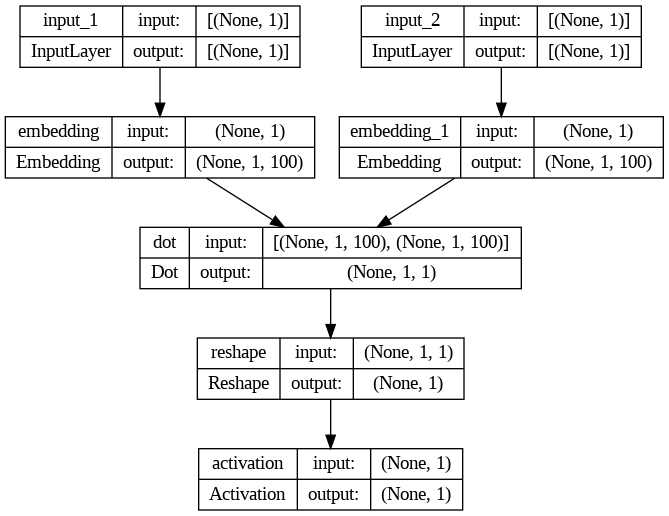

In [39]:
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)

In [40]:
for epoch in range(10):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype = 'int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype = 'int32')
        labels = np.array(elem[1], dtype = 'int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch: ', epoch+1, 'Loss: ', loss)

Epoch:  1 Loss:  3.4655874967575073
Epoch:  2 Loss:  3.458177864551544
Epoch:  3 Loss:  3.4504719376564026
Epoch:  4 Loss:  3.4418962001800537
Epoch:  5 Loss:  3.432107448577881
Epoch:  6 Loss:  3.4207682013511658
Epoch:  7 Loss:  3.4075523614883423
Epoch:  8 Loss:  3.392150342464447
Epoch:  9 Loss:  3.374267876148224
Epoch:  10 Loss:  3.3536314964294434


In [41]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
# print(vectors)

for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [42]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

ValueError: ignored

In [ ]:
w2v.most_similar(positive = ['하늘'])